<a href="https://colab.research.google.com/github/as1605/ELL715/blob/main/A1/A1Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import exposure

In [6]:
image_path = '/content/lenna.png'
input_image = np.array(Image.open(image_path))
# input_image.shape

(512, 512, 3)

In [16]:
def save_img(np_img, name):
  pillow_img = Image.fromarray(np.uint8(np_img)).convert('RGB')
  pillow_img.save('/content/'+name+'.png')

In [17]:
save_img(input_image, 'original')

In [18]:
negative_image = 255 - input_image
save_img(negative_image, 'negative')

In [28]:
c = 255/(np.log(1+255))
log_transformed_image = c*np.log1p(input_image)
save_img(log_transformed_image, 'log_transformed_image')
antilog_transformed_image = np.exp(input_image/c)
save_img(antilog_transformed_image, 'antilog_transformed_image')

In [29]:
gamma_values = [0.4, 2.5, 10, 25, 100]
gamma_corrected_images = []

In [32]:
for gamma in gamma_values:
    img = np.power(input_image / 255.0, gamma) * 255.0
    gamma_corrected_images.append(img)
    save_img(img, 'gamma_'+str(gamma))

In [ ]:
power_2_image = np.power(input_image, 2)
power_3_image = np.power(input_image, 3)
power_4_image = np.power(input_image, 4)

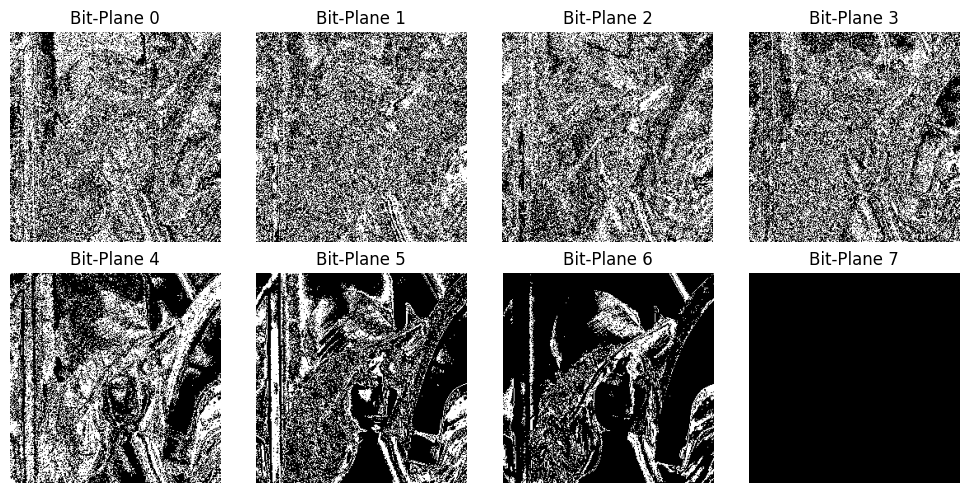

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(8):
    bit_plane = (input_image >> i) & 1
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_plane, cmap='gray')
    plt.title(f'Bit-Plane {i}')
    plt.axis('off')
plt.tight_layout()

Text(0.5, 1.0, 'Original Image Histogram')

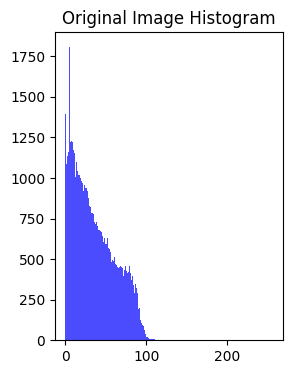

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(input_image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Original Image Histogram')

Text(0.5, 1.0, 'Histogram Equalization')

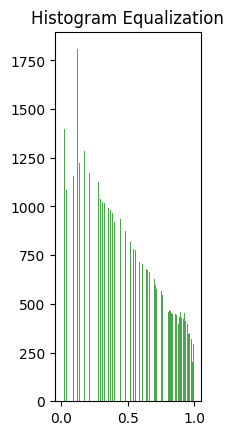

In [ ]:
histeq_image = exposure.equalize_hist(input_image)
plt.subplot(1, 3, 2)
plt.hist(histeq_image.ravel(), bins=256, range=(0, 1), color='green', alpha=0.7)
plt.title('Histogram Equalization')

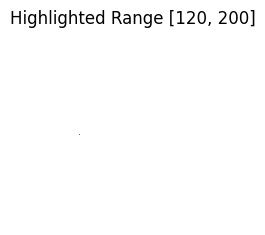

In [ ]:
highlighted_range_image = (input_image - 120) * (255 / (200 - 120))
highlighted_range_image[highlighted_range_image < 0] = 0
highlighted_range_image[highlighted_range_image > 255] = 255
plt.subplot(1, 3, 3)
plt.imshow(highlighted_range_image, cmap='gray')
plt.title('Highlighted Range [120, 200]')
plt.axis('off')
plt.tight_layout()

plt.show()